# Yulu Business Case

# Introduction:

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

# Problem Statement:

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

df = pd.read_csv(url)

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* There are no null values in the Dataset

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df['season'].value_counts(normalize = True) * 100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [ ]:
df['workingday'].value_counts(normalize = True) * 100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [ ]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df['holiday'].value_counts(normalize = True) * 100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df['weather'].value_counts(normalize = True) * 100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

# Working day VS Count of Bicycles rented

<Axes: xlabel='workingday', ylabel='count'>

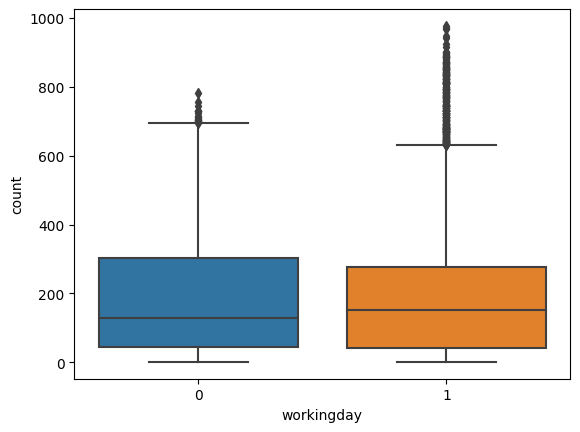

In [ ]:
sns.boxplot(x="workingday", y="count", data=df)

* We see there is no significance difference in Bicycle usage during weekend and weekdays.

# Hypothesis

* H0 : Demand is similar or less on non working day as compared to working day
* Ha : Demand is higher on non working day as compared to working day

In [ ]:
non_working_day = df[df["workingday"]==0]["count"].sample(3000)
working_day = df[df["workingday"]==1]["count"].sample(3000)

In [ ]:
df.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
# SD is not equal so the variance also not equal for these two series.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
test_stats, p_value = ttest_ind(non_working_day, working_day, equal_var = False, alternative = "greater")

In [ ]:
p_value > 0.5

True

# Inference:

* p_value is greater than the level of significance. So we fail to reject the null hypothesis.
* Hence demand for bicycles is similar or less on non working day compared to working day.

# Weather VS Count of Bicycles rented

<Axes: xlabel='weather', ylabel='count'>

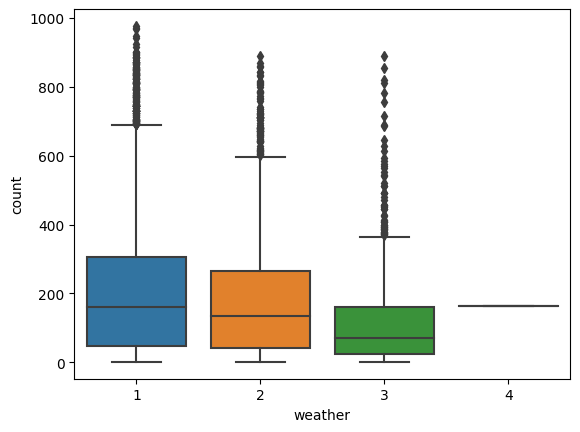

In [ ]:
sns.boxplot(x="weather", y="count", data = df)

In [ ]:
df = df[~(df["weather"] == 4)]

In [ ]:
df.groupby(["weather"])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


In [ ]:
w1 = df[df["weather"]==1]["count"].sample(850)
w2 = df[df["weather"]==2]["count"].sample(850)
w3 = df[df["weather"]==3]["count"].sample(850)

<ipython-input-98-1593fd99ad76>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w1)


<Axes: xlabel='count', ylabel='Density'>

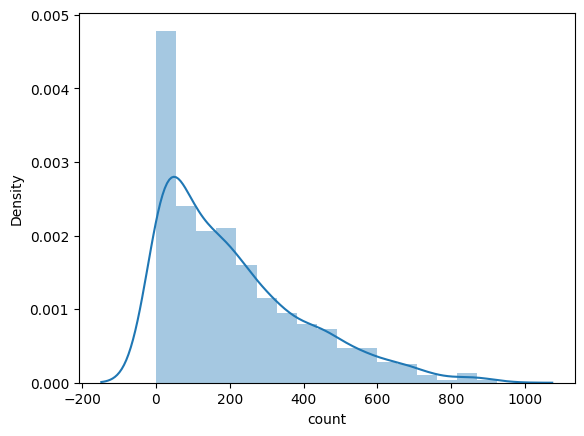

In [ ]:
sns.distplot(w1)

<ipython-input-99-5a052d2b4ef6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w2)


<Axes: xlabel='count', ylabel='Density'>

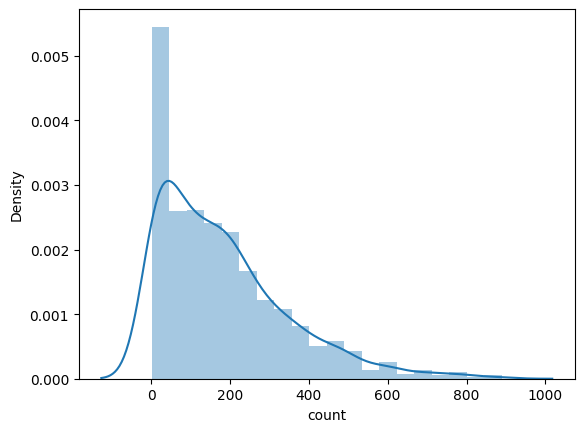

In [ ]:
sns.distplot(w2)

<ipython-input-100-ab30abfc5074>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(w3)


<Axes: xlabel='count', ylabel='Density'>

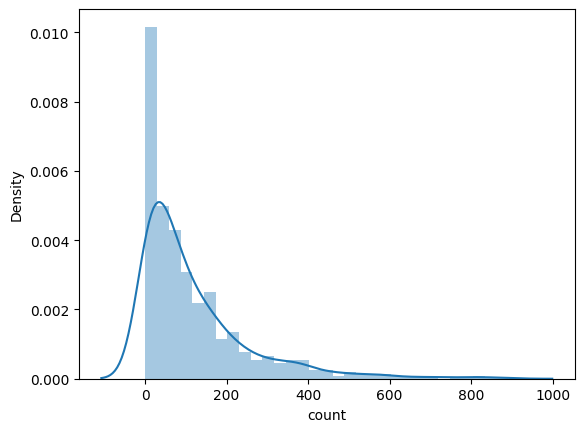

In [ ]:
sns.distplot(w3)

<ipython-input-101-51666bb9cfd4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w1))


<Axes: xlabel='count', ylabel='Density'>

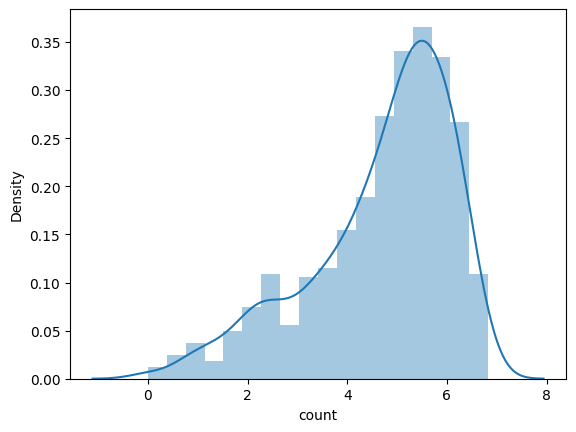

In [ ]:
sns.distplot(np.log(w1))

<ipython-input-102-33494180ff8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w2))


<Axes: xlabel='count', ylabel='Density'>

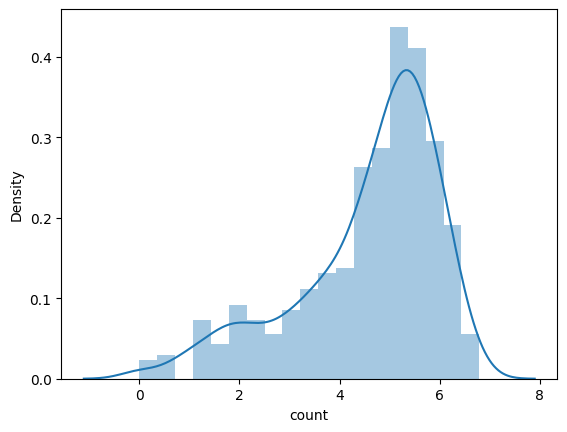

In [ ]:
sns.distplot(np.log(w2))

<ipython-input-103-5f861259b3fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(w3))


<Axes: xlabel='count', ylabel='Density'>

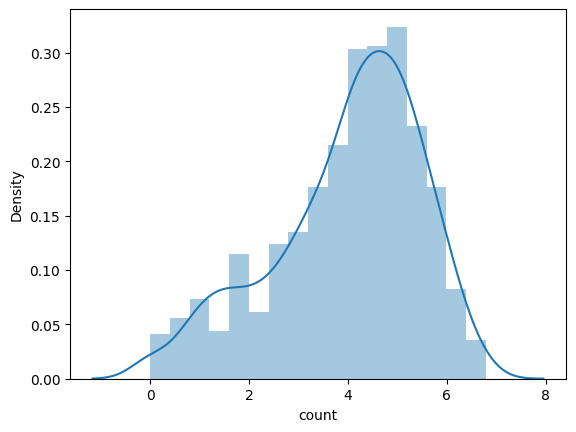

In [ ]:
sns.distplot(np.log(w3))

# Hypothesis 2:

* H0 : w1, w2, w3 are not normal
* H1 : w1, w2, w3 are normal

In [ ]:
from scipy.stats import shapiro

In [ ]:
# find the p_value

w, p_value = shapiro(w1)

print("The p value is", p_value)

The p value is 3.381021157745164e-24


In [ ]:
p_value > 0.5

False

In [ ]:
from scipy.stats import levene

statistics, p_value = levene(w1, w2, w3)

print("The p value is", p_value)

The p value is 1.828049535533131e-21


In [ ]:
p_value > 0.5

False

# Inference:

* The following series are not in Gaussian distribution.

# Hypothesis 3:

* H0: count of Bicycles rented are independant of the weather
* Ha: Count of Bicycles rented are dependant weather

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(w1, w2, w3)

p_value

1.4574971697804216e-28

In [ ]:
p_value > 0.5

False

# Inference:

* We see p_value is less than level of significance. Hence null hypothesis cannot be rejected.
* We conclude that count of Bicycles rented are independant of the weather.

# Season vs Count of Bicycles rented

<Axes: xlabel='season', ylabel='count'>

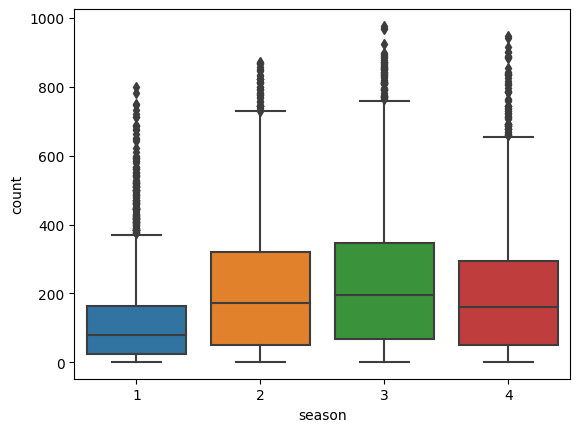

In [ ]:
sns.boxplot(x="season", y="count", data = df)

In [ ]:
df.groupby(["season"])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
s1 = df[df["season"]==1]["count"].sample(1000)
s2 = df[df["season"]==2]["count"].sample(1000)
s3 = df[df["season"]==3]["count"].sample(1000)
s4 = df[df["season"]==4]["count"].sample(1000)

<ipython-input-114-7f1f713b11a3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s1)


<Axes: xlabel='count', ylabel='Density'>

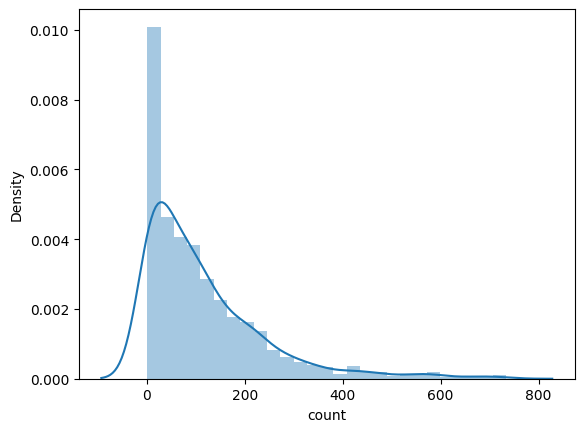

In [ ]:
sns.distplot(s1)

<ipython-input-115-2e3afb5f3f0f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s2)


<Axes: xlabel='count', ylabel='Density'>

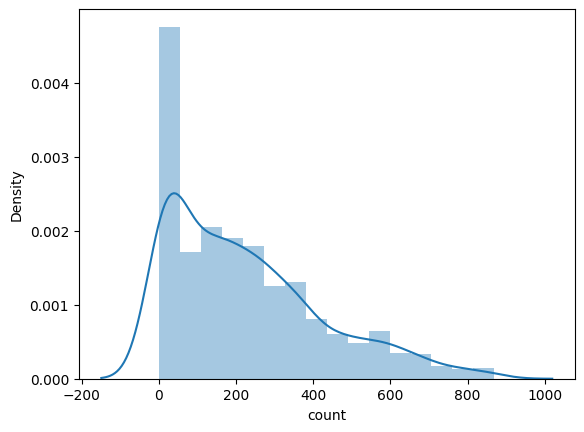

In [ ]:
sns.distplot(s2)

<ipython-input-116-851b8ae0e745>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s3)


<Axes: xlabel='count', ylabel='Density'>

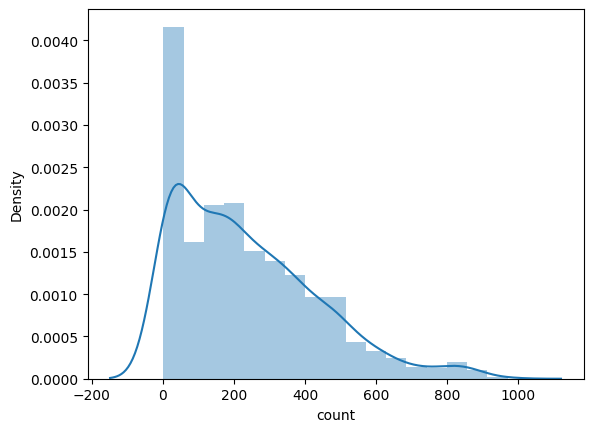

In [ ]:
sns.distplot(s3)

<ipython-input-117-4000a8915f5d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s4)


<Axes: xlabel='count', ylabel='Density'>

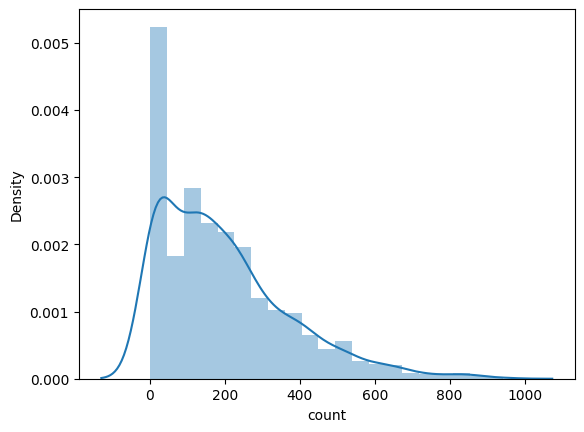

In [ ]:
sns.distplot(s4)

In [ ]:
w, p_value = shapiro(s1)

print("The p value is", p_value)

The p value is 6.383599948641174e-33


In [ ]:
p_value > 0.5

False

In [ ]:
statistics, p_value = levene(s1, s2, s3, s4)

print("The p value is", p_value)

The p value is 3.2194798202547434e-50


In [ ]:
p_value > 0.05

False

In [ ]:
# H0 : The distribution of all samples are equal
# Ha : The distribution of one or more samples are not equal

from scipy.stats import kruskal

stat, p = kruskal(s1, s2, s3, s4)

print("The p_value is", p)

The p_value is 4.792957501552576e-60


In [ ]:
p > 0.05

False

# Inference:

* We see the following series are not in guassian distribution.

# Hypothesis 4:

* H0: count of Bicycles rented are independant of the season
* Ha: Count of Bicycles rented are dependant season

In [ ]:
test_stat, p_value = f_oneway(s1, s2, s3, s4)

print("The P value is", p_value)

The P value is 1.4083810819546902e-55


In [ ]:
p_value > 0.5

False

# Inference:

* Here we see the p_value is less than the level of significance. So we conclude that Null Hypothesis cannot be rejected. Hence count of Bicycles are independant of the season.


# weather vs season

In [ ]:
obs = pd.crosstab(df["season"], df["weather"])
obs

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


# Hypothesis 4:

* H0 : Weather and season are independant.
* Ha : weather and season are dependant.

In [ ]:
from scipy.stats import chi2_contingency

chi2_contingency(obs)

#print("The p_value is", p)

Chi2ContingencyResult(statistic=46.10145731073249, pvalue=2.8260014509929343e-08, dof=6, expected_freq=array([[1774.04869086,  699.06201194,  211.8892972 ],
       [1805.76352779,  711.55920992,  215.67726229],
       [1805.76352779,  711.55920992,  215.67726229],
       [1806.42425356,  711.81956821,  215.75617823]]))

# Inference:

* We see the p-value is less than the level of significance therefore the Null Hypothesis cannot be rejected. It concludes weather and season are independant.

# Findings:

* We see there no impact on Biycles rented by weather and season.
* We found there is not major change in Bicycles rented during weekends and weekdays.
* We see there is no dependancy between weather and season.
* we see bikes rented are negligible during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather conditions.
* During fall season and Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather conditions. The Bicycles rented are related less.

# Recommendations:

* Yulu should avoid renting Bicycles during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather conditions, because weather is not ideal for the customers to ride.
* Yulu should focus majoirly on season 2, 3, 4 to increase renting of Bicycles by offering some discounts, vouchers and ensure safe drive services to the customers.
